# Heart Disease Prediction

### Importing Libraries

In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [4]:
df = pd.read_csv('C:/Users/User/Downloads/heart.csv')

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
df.shape

(1025, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [16]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

0 => No Heart Disease

1 => Heart Disease

### Visualization

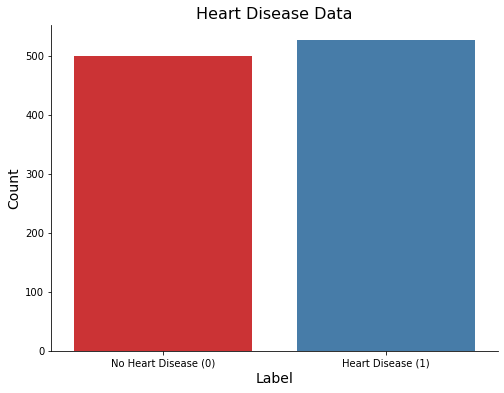

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x=df['target'], palette="Set1")
plt.title("Heart Disease Data", fontsize=16)
plt.xlabel("Label", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks([0, 1], ["No Heart Disease (0)", "Heart Disease (1)"])  # Customizing x-axis labels
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Separating features and target

In [25]:
X = df.drop(columns='target', axis=1)
Y = df['target']

### Standardizing the features

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting Training and Testing Data

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, stratify=Y)

In [60]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (820, 13)
X_test shape: (205, 13)
y_train shape: (820,)
y_test shape: (205,)


## Model Evaluation

### Logistic Regression

In [76]:
lr_model = LogisticRegression(max_iter=1000, random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [77]:
y_pred_test = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.848780487804878


In [78]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.84      0.87      0.85       105

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



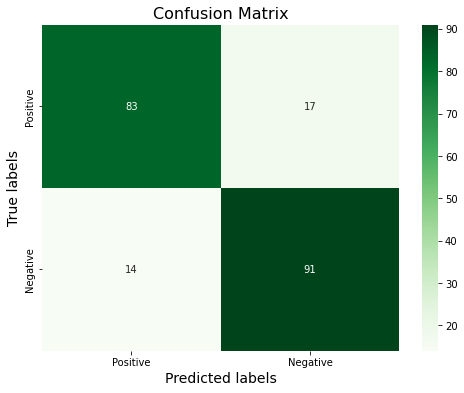

In [80]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### SVM

In [81]:
svm_model = SVC(C=1.0, kernel='linear', random_state=1)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=1)

In [82]:
y_pred_test = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.8585365853658536


In [83]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85       100
           1       0.83      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



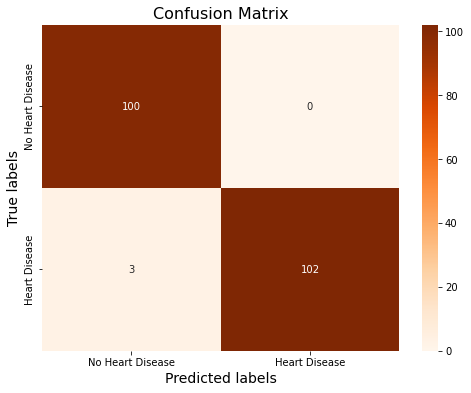

In [99]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Random Forest

In [85]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [86]:
y_pred_test = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy:", accuracy)

Testing Accuracy: 0.9853658536585366


In [87]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



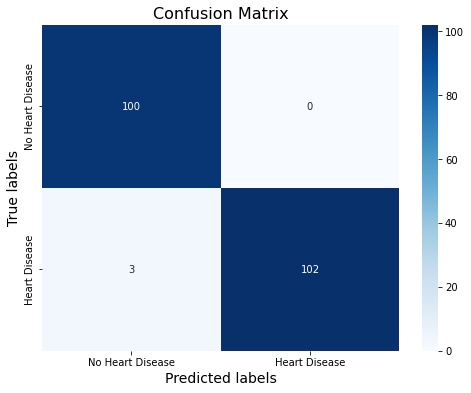

In [93]:
cm = confusion_matrix(y_test, y_pred_test)
class_names = ['No Heart Disease', 'Heart Disease']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### Saving the Model

In [100]:
pickle.dump(rf_model, open('Heart_Disease_Model.sav', 'wb'))

## Predictive System

In [116]:
# Taking user inputs
age = int(input("Enter Age: "))
sex = input("Enter Gender (Male / Female): ")
cp = int(input("Enter Chest Pain type: "))
trestbps = int(input("Enter Resting Blood Pressure: "))
chol = int(input("Enter Serum Cholestoral (mg/dl): "))
fbs = int(input("Enter Fasting Blood Sugar (mg/dl): "))
restecg = int(input("Enter Resting Electrocardiographic results: "))
thalach = int(input("Enter maximum Heart Rate achieved: "))
exang = int(input("Enter exercise induced Angina: "))
oldpeak = float(input("Enter ST depression induced by exercise relative to rest: "))
slope = int(input("Enter the slope of the peak exercise ST segment: "))
ca = int(input("Enter number of major vessels colored by flourosopy: "))
thal = int(input("Enter Thallium Stress test results: "))

binary_map_gen = {"Male": 1, "Female": 0}
sex = binary_map_gen.get(sex, -1)

# Converting the list in a DataFrame
features_df = pd.DataFrame({
    "age": [age],
    "sex": [sex],
    "cp": [cp],
    "trestbps": [trestbps],
    "chol": [chol],
    "fbs": [fbs],
    "restecg": [restecg],
    "thalach": [thalach],
    "exang": [exang],
    "oldpeak": [oldpeak],
    "slope": [slope],
    "ca": [ca],
    "thal": [thal]
})

# Predicting heart disease based on the features
prediction = rf_model.predict(features_df)

# Display the prediction"
if prediction[0] == 0:
    print("\n\033[1mYou do not have Heart Disease")
else:
    print("\n\033[1mYou have Heart Disease")

Enter Age: 58
Enter Gender (Male / Female): Female
Enter Chest Pain type: 0
Enter Resting Blood Pressure: 100
Enter Serum Cholestoral (mg/dl): 248
Enter Fasting Blood Sugar (mg/dl): 0
Enter Resting Electrocardiographic results: 0
Enter maximum Heart Rate achieved: 122
Enter exercise induced Angina: 0
Enter ST depression induced by exercise relative to rest: 1
Enter the slope of the peak exercise ST segment: 1
Enter number of major vessels colored by flourosopy: 0
Enter Thallium Stress test results: 2

You have Heart Disease
